In [31]:
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential # Convenient, not very flexible BECAUSE: 1-1 relationship between input and output
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.python.ops.numpy_ops import np_config
from tensorflow import keras
import tensorflow.keras.backend as k
import numpy as np
import matplotlib.pyplot as plt
import time
import gc

np_config.enable_numpy_behavior()

In [49]:
!pip install keras==2.6.0 --user

In [37]:
!pip install tensorflow==2.8 --user

In [7]:
X = pickle.load(open('X.pkl', 'rb'))
y = pickle.load(open('y.pkl', 'rb'))

X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

breedX = pickle.load(open('breedX.pkl', 'rb'))
breedy = pickle.load(open('breedy.pkl', 'rb'))

print(breedX.shape)
print(breedy.shape)
print(X.shape)
print(y.shape)

(5884, 100, 100, 3)
(5884,)
(23000, 100, 100, 3)
(23000,)


In [8]:
X = X/255
X_test = X_test/255
breedX = breedX/255
breedy = breedy/1.0

In [9]:
breedX.shape

(5884, 100, 100, 3)

In [178]:
gc.collect()

0

In [190]:
#class myloss(tf.keras.losses.Loss):
#    def __init__(self, y_true, y_pred):
#        super().__init__(self)
#        self.y_true = y_true
#        self.y_pred = y_pred
#        print(f" TRUE: {self.y_true}")
#        print(f" PRED: {self.y_pred}")
#    def call(self):
#        print(f" TRUE: {self.y_true}")
#        print(f" PRED: {self.y_pred}")
#        return -1/n * tf.reduce_mean(y_true*tf.log(y_pred) + (1 - y_true)*tf.log(1 - y_pred))
# LOOK AT THE OUTPUT OF EACH BLOCK BREAK IT APART
# TAKE A LOOK AND SEE TRANSFER LEARNING
def customloss(y_true, y_pred):
    print(f" TRUE: {y_true}")
    print(f" PRED: {y_pred}")
    tf.cast(y_true, tf.float32)
    tf.cast(y_pred, tf.float32)
    n = 2
    return tf.cast(-1/n * tf.reduce_mean(y_true*tf.math.log(y_pred) + (1 - y_true)*tf.math.log(1 - y_pred)), tf.int32)

In [44]:
type(tf.keras.losses.SparseCategoricalCrossentropy())

tensorflow.python.keras.losses.SparseCategoricalCrossentropy

In [181]:
def customloss(y_true, y_pred):
    #Hinge loss algo
    #new = y_true - y_pred
    print(f"BEFORE t {type(y_true)}")
    print(f"BEFORE p {type(y_pred)}")
    #y_true = tf.cast(y_true, tf.float32)
    #y_pred = tf.cast(y_pred, tf.float32)
    #y_true = y_true.as_dtype("float")
    #y_pred = y_pred.as_dtype("float")
    print(f" TRUE: {tf.get_static_value(y_true)}")
    print(f" PRED: {tf.get_static_value(y_pred)}")
    n = tf.constant(0.0, tf.float64)
    print(tf.reduce_mean(tf.math.maximum(n, 1.0 - y_pred*y_true)))
    return tf.math.maximum(n, 1.0 - y_pred*y_true)

# Simulate the training process with neuron number as the variable and save the best performing one
bestPercentage = 0
bestModel = Sequential()
#bestBreedModel = Sequential()
bestBreedPercentage = 0

gc.collect()
# BRUTE FORCE
neuronNumber = [i for i in range(200, 1200, 200)]

# THIS TOOK around 2 hours for it to run on my computer, run with preparation
model = Sequential()

for i in range(1):
    NAME = f'cat-vs-dog-prediction-{int(time.time())}'

    tensorBoard = TensorBoard(log_dir=f'logs\\{NAME}\\')

    model = Sequential()
    #breedModel = Sequential()

    #Add the first layer
    model.add(Conv2D(32, (5, 5), activation = 'relu'))
    #breedModel.add(Conv2D(64, (3, 3), activation = 'relu'))
    
    #Add a pooling layer
    model.add(MaxPooling2D(pool_size = (2, 2)))
    #breedModel.add(MaxPooling2D(pool_size = (2,2)))

    #Add another convolution layer
    model.add(Conv2D(32, (5, 5), activation = 'relu'))
    #breedModel.add(Conv2D(64, (3, 3), activation = 'relu'))

    #Add another pooling layer
    model.add(MaxPooling2D(pool_size = (2, 2)))
    #breedModel.add(MaxPooling2D(pool_size = (2,2)))

    #Add a flattening layer
    model.add(Flatten())
    #breedModel.add(Flatten())
    
    #Add a layer with X neurons
    model.add(Dense(neuronNumber[i], input_shape = X.shape[1:], activation = 'relu'))
    #breedModel.add(Dense(neuronNumber[i], input_shape = breedX.shape[1:], activation = 'relu'))
    
    #Add a drop out layer
    model.add(Dropout(0.5))
    #breedModel.add(Dropout(0.5))
    
    #Add a layer with X/2 neurons
    model.add(Dense(neuronNumber[i]/2, input_shape = X.shape[1:], activation = 'relu'))
    #breedModel.add(Dense(neuronNumber[i]/2, input_shape = breedX.shape[1:], activation = 'relu'))
    
    #Add another drop out layer
    model.add(Dropout(0.5))
    #breedModel.add(Dropout(0.5))
    
    #Add a layer with X/4 neurons
    model.add(Dense(neuronNumber[i]/4, input_shape = X.shape[1:], activation = 'relu'))

    #Add a layer with 1 neurons to decide cat or dog
    model.add(Dense(2, activation = 'softmax'))
    
    #layer to find breed
    #breedModel.add(Dense(37, activation = 'softmax'))

    #Compile the models "sparse_categorical_crossentropy" customloss
    #VISUALIZE
    model.compile(optimizer = 'adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])
    #breedModel.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    #Train the model
    model.fit(X, y, epochs=5, batch_size=64, callbacks=[tensorBoard])
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names = True)
    gc.collect()
    
    #history = breedModel.fit(breedX, breedy, epochs=10, validation_split=0.2)
    
    percentage = model.evaluate(X_test, y_test)[1]
    #breedPercentage = history.history['accuracy'][-1]
    
    if percentage > bestPercentage:
        print(percentage)
        bestPercentage = percentage
        bestModel = model
    #if breedPercentage > bestBreedPercentage:
        #print(f"breeding percentage: {breedPercentage}")
        #bestBreedPercentage = breedPercentage
        #bestBreedModel = breedModel

print(bestPercentage)


Epoch 1/5
BEFORE t <class 'tensorflow.python.framework.ops.Tensor'>
BEFORE p <class 'tensorflow.python.framework.ops.Tensor'>
 TRUE: None
 PRED: None
Tensor("customloss/Mean:0", shape=(), dtype=float64)
BEFORE t <class 'tensorflow.python.framework.ops.Tensor'>
BEFORE p <class 'tensorflow.python.framework.ops.Tensor'>
 TRUE: None
 PRED: None
Tensor("customloss/Mean:0", shape=(), dtype=float64)
360/360 [==============================] - 11s 27ms/step - loss: 0.7500 - accuracy: 0.5012
Epoch 2/5
360/360 [==============================] - 9s 25ms/step - loss: 0.7500 - accuracy: 0.5060
Epoch 3/5
360/360 [==============================] - 9s 25ms/step - loss: 0.7500 - accuracy: 0.5017
Epoch 4/5
360/360 [==============================] - 9s 24ms/step - loss: 0.7500 - accuracy: 0.5033
Epoch 5/5
360/360 [==============================] - 8s 24ms/step - loss: 0.7500 - accuracy: 0.4992
BEFORE t <class 'tensorflow.python.framework.ops.Tensor'>
BEFORE p <class 'tensorflow.python.framework.ops.Tensor

In [32]:
filters, biases = model.layers[0].getweights()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 7, 1

for i in range(n_filters):
    f = filters[:,:,:, i]
    
    for j in range(6):
        ax = pyplot.subplot(n_filters, 6, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        
        pyplot.imshpw(f[:,:, j], cmap="gray")
        ix += 1

pyplot.show()

AttributeError: 'Conv2D' object has no attribute 'getweights'

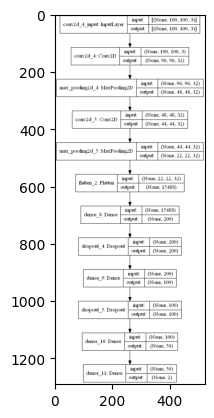

In [13]:
chart = plt.imread('model_plot.png')
plt.imshow(chart)

In [3]:
from ann_visualizer.visualize import ann_viz
import graphviz

In [48]:
ann_viz(model, filename="catANDDog.gv", title="CatANDDog")

AlreadyExistsError: Another metric with the same name already exists.

In [7]:
 bestModel.evaluate(X_test, y_test)[1]

63/63 [==============================] - 0s 4ms/step - loss: 0.6732 - accuracy: 0.7540


0.7540000081062317

For graphs, use:
tensorboard --logdir=logs/

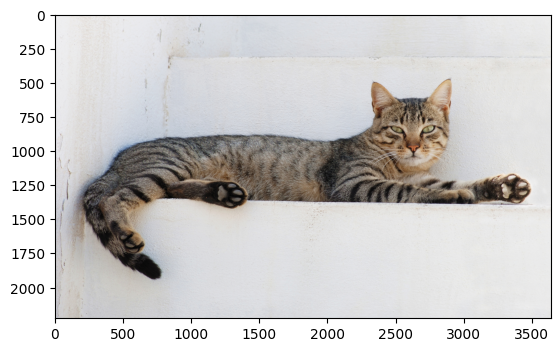

In [9]:
picturePath = r'D:\Courses\Numerical Computation\Project\cat2.jpg'

# Show image
cat_image = plt.imread(picturePath)
img = plt.imwrite(cat_image)

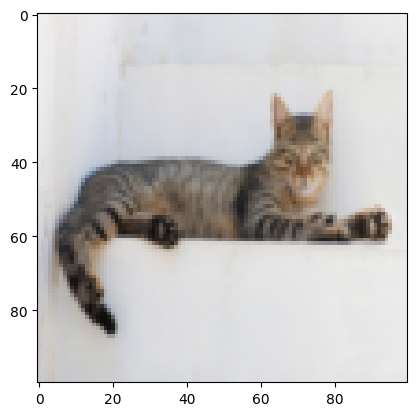

In [10]:
# Resize the image
from skimage.transform import resize
resized_image = resize(cat_image, (100, 100, 3))
img = plt.imshow(resized_image)

In [11]:
# Get the models predictions
predictions = bestModel.predict(np.array([resized_image]))
category = ['Cats', 'Dogs']
# Show the predictions
predictions
print(predictions)
print(category[0])

[[0.9207823  0.07921764]]
Cats


[16, 9, 12, 2, 20, 6, 36, 3, 22, 1, 17, 14, 29, 23, 7, 27, 32, 21, 15, 5, 0, 31, 10, 33, 26, 25, 4, 18, 8, 30, 34, 19, 35, 11, 24, 28, 13]


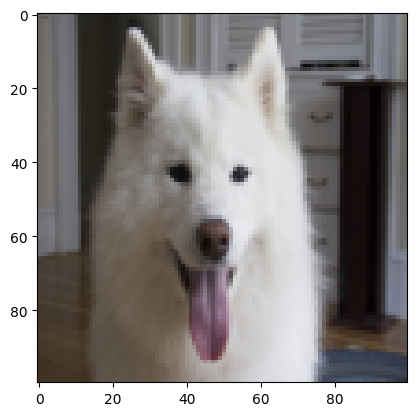

In [12]:
list_index = [i for i in range(37)]
dogDir = r'E:\Machine Learning Pic\Breed\Cats-and-Dogs-Breed-Dataset-main\TEST\219.jpg'

dog_pic = plt.imread(dogDir)
resized_image = resize(dog_pic, (100, 100, 3))
img = plt.imshow(resized_image)

x = bestBreedModel.predict(np.array([resized_image]))

for i in range(37):
    for j in range(37):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

print(list_index)

In [19]:
# Print the mostlikely solutions
totalBreed = pickle.load(open('totalBreed.pkl', 'rb'))

print(totalBreed[list_index[0]])

persian
